I used `pygetpapers` to download all the suplimentary files analysed in the notebook.   

Query: 
```
pygetpapers --terms C:\Users\shweata\tps_pmcid.txt -k 400 -o "tps_300" --supp
```
Instead of specifying the query, I created a custom corpus by specifying PMCIDs. To do so, I created a text file with PMCIDS (comma-separted), and used `--terms` flags. You can check the text file, [here](https://github.com/petermr/dictionary/blob/main/tps_data_availability/tps_pmcid.txt).

The corpus has 283 CTrees. But all of them wouldn't have supplementary data. 

The purpose of this notebook is to analyse how many of these papers have supplemental data, and what formats they are in. 

In [113]:
import os
from glob import glob
import pathlib
from collections import Counter
import pandas as pd
import zipfile

In [114]:
HOME= os.path.expanduser("~") # gets home directory
TPS_DIRECTORY = 'tps_300' # CProject directory
get_num_supp = (glob(os.path.join(HOME, TPS_DIRECTORY, "*", "supplementaryfiles")))
supp_glob = (glob(os.path.join(HOME, TPS_DIRECTORY, "*", "supplementaryfiles", "*"),recursive=True))
#C:\Users\shweata\tps_300\PMC3195254\supplementaryfiles

In [115]:
len(get_num_supp)

209

In [116]:
supp_extension = []
for supp_file_name in supp_glob:
    supp_extension.append((pathlib.Path(supp_file_name).suffix).lower())


<AxesSubplot:>

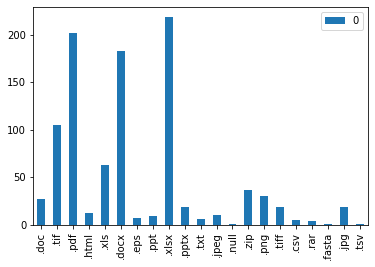

In [117]:
ext_counts = Counter(supp_extension)
df = pd.DataFrame.from_dict(ext_counts, orient='index')
df.plot(kind='bar')

In [118]:
ext_counts

Counter({'.doc': 27,
         '.tif': 105,
         '.pdf': 202,
         '.html': 12,
         '.xls': 63,
         '.docx': 183,
         '.eps': 7,
         '.ppt': 9,
         '.xlsx': 218,
         '.pptx': 18,
         '.txt': 6,
         '.jpeg': 10,
         '.null': 1,
         '.zip': 36,
         '.png': 30,
         '.tiff': 18,
         '.csv': 5,
         '.rar': 4,
         '.fasta': 1,
         '.jpg': 18,
         '.tsv': 1})

In [119]:
zip_file_names = []
for supp_file_name in supp_glob:
    filename, file_extension = os.path.splitext(supp_file_name)
    if file_extension.lower() == '.zip':
        with zipfile.ZipFile(supp_file_name, 'r') as my_zip:
            zip_file_names.extend((my_zip.namelist()))
            
len(zip_file_names)

283

In [120]:
zip_supp_extension = []
for zip_file_name in zip_file_names:
    zip_supp_extension.append((pathlib.Path(zip_file_name).suffix).lower())

<AxesSubplot:>

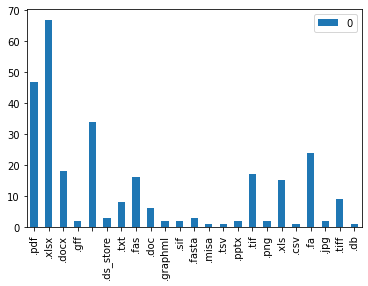

In [121]:
zip_ext_counts = Counter(zip_supp_extension)
df = pd.DataFrame.from_dict(zip_ext_counts, orient='index')
df.plot(kind='bar')

In [122]:
zip_ext_counts

Counter({'.pdf': 47,
         '.xlsx': 67,
         '.docx': 18,
         '.gff': 2,
         '': 34,
         '.ds_store': 3,
         '.txt': 8,
         '.fas': 16,
         '.doc': 6,
         '.graphml': 2,
         '.sif': 2,
         '.fasta': 3,
         '.misa': 1,
         '.tsv': 1,
         '.pptx': 2,
         '.tif': 17,
         '.png': 2,
         '.xls': 15,
         '.csv': 1,
         '.fa': 24,
         '.jpg': 2,
         '.tiff': 9,
         '.db': 1})

In [126]:
df = pd.DataFrame(get_num_supp)
df.columns=['path']


In [124]:
PMCID = []
for index, row in df.iterrows():
    split_path = row["path"].split('\\')
    PMCID.append(split_path[4])
df["PMCID"] = PMCID

In [125]:
df.to_csv('supp_exists.csv')